# Data Analysis & Visualization

Data Analysis and Visualization of Cleaned Global Weather Data

1. [Importing Data](#Importing-data)
2. [Visualization & Analysis](#Visualization-and-Analysis)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [24]:
df = pd.read_csv('../data/CleanedGlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [25]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

# Visualization and Analysis

## Temperature

In [26]:
avg_temps = df.groupby('location_name')['temperature_celsius'].mean().sort_values(ascending=False)

In [27]:
print('Top 5 Hottest Cities in the World (in Celcius):')
avg_temps.head()

Top 5 Hottest Cities in the World (in Celcius):


location_name
Ar Riyadh      45.000000
Kuwait         44.400000
Baghdad        41.910968
Riyadh         41.428571
Kuwait City    41.368182
Name: temperature_celsius, dtype: float64

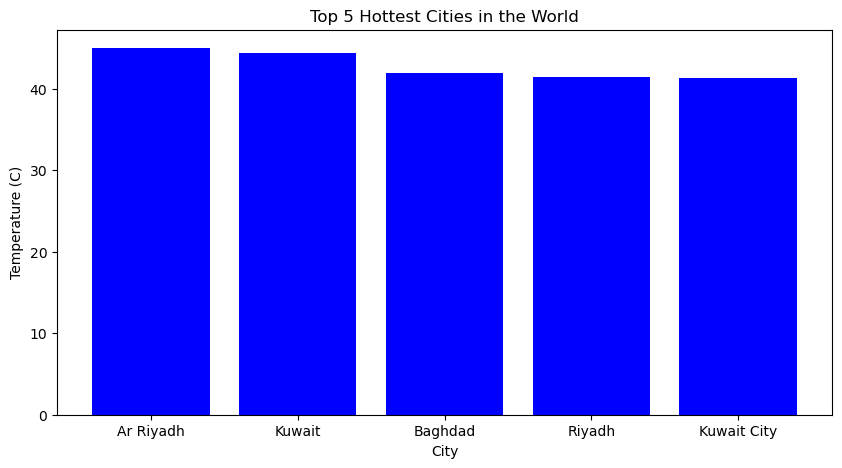

<Figure size 640x480 with 0 Axes>

In [50]:
hottest = avg_temps.head(5)
idx, values = hottest.index, hottest.values

plt.figure(figsize=(10, 5))
plt.bar(idx, values, color='blue')
plt.xlabel('City')
plt.ylabel('Temperature (C)')
plt.title('Top 5 Hottest Cities in the World')
plt.show()
plt.savefig('graphs/top5hottestcities.png')

In [28]:
print('Top 5 Coldest Cities in the World (in Celcius):')
avg_temps.tail(5).sort_values()

Top 5 Coldest Cities in the World (in Celcius):


location_name
Santiago          6.884516
Canberra          6.920779
Vestmannaeyjar    8.485593
Grindavik         8.894444
Reykjavik         9.800000
Name: temperature_celsius, dtype: float64

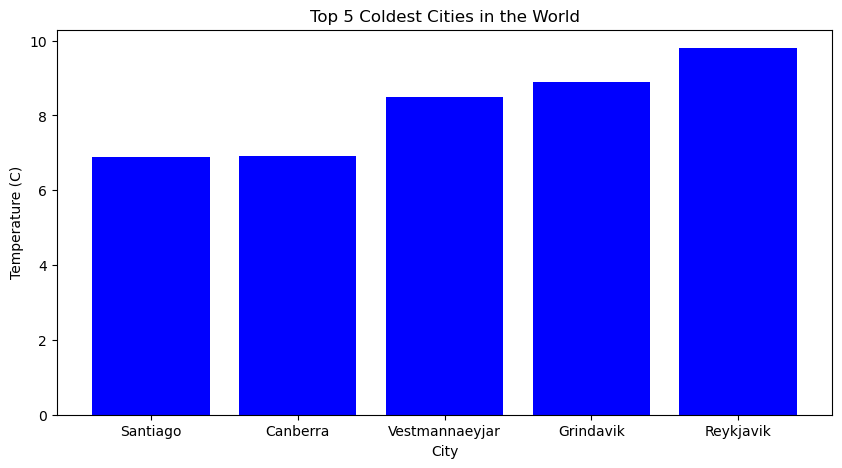

<Figure size 640x480 with 0 Axes>

In [51]:
coldest = avg_temps.tail(5).sort_values()
idx, values = coldest.index, coldest.values

plt.figure(figsize=(10, 5))
plt.bar(idx, values, color='blue')
plt.title('Top 5 Coldest Cities in the World')
plt.xlabel('City')
plt.ylabel('Temperature (C)')
plt.show()
plt.savefig('graphs/top5coldestcities.png')

## Precipitaion

In [29]:
avg_rain = df.groupby('location_name')['precip_mm'].mean().sort_values(ascending=False)

In [30]:
lowest = avg_rain.tail(5).sort_values()
print('Top 5 Cities with the Lowest Average Rainfall (per day in mm):')
lowest

Top 5 Cities with the Lowest Average Rainfall (per day in mm):


location_name
Kuwait         0.0
Ar Riyadh      0.0
Kuwait City    0.0
Doha           0.0
New York       0.0
Name: precip_mm, dtype: float64

In [31]:
highest = avg_rain.head(5)
print('Top 5 Cities with the Highest Average Rainfall (per day in mm):')
highest

Top 5 Cities with the Highest Average Rainfall (per day in mm):


location_name
Vientiane          1.97000
Palau              1.59000
Ivory Ivory Ban    1.55000
Freetown           0.94817
Douala             0.90000
Name: precip_mm, dtype: float64

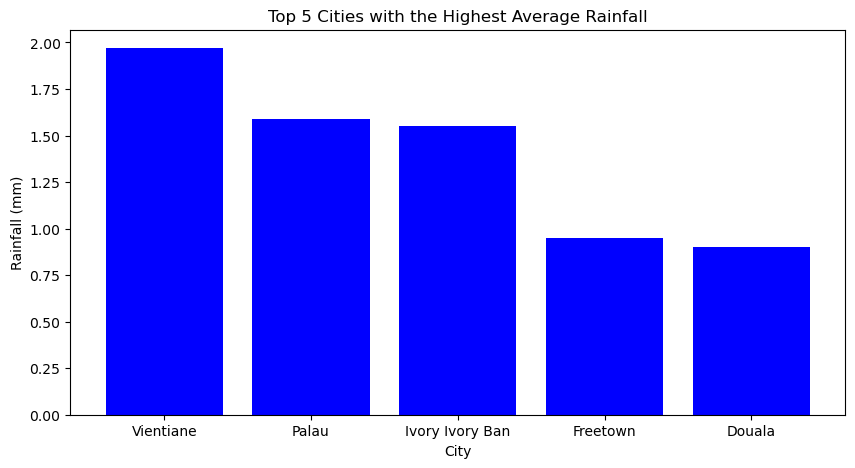

<Figure size 640x480 with 0 Axes>

In [52]:
idx, values = highest.index, highest.values

plt.figure(figsize=(10, 5))
plt.bar(idx, values, color='blue')
plt.title('Top 5 Cities with the Highest Average Rainfall')
plt.xlabel('City')
plt.ylabel('Rainfall (mm)')
plt.show()
plt.savefig('graphs/top5highestRainfallCities.png')

## Temperature (grouped by Year/Month)

In [38]:
df['year'] = df['last_updated'].apply(lambda x: x.split('-')[0])
df['year'].unique()

array(['2024'], dtype=object)

**Since, data available is for one year. Let's explore month**

In [39]:
df['month'] = df['last_updated'].apply(lambda x: x.split('-')[1])
df['month'].unique()

array(['05', '06', '07', '08', '09', '10'], dtype=object)

**Since, we have 6 unique months, lets have an average for them.**

In [41]:
temps = df.groupby('month')['temperature_celsius'].mean()
temps

month
05    25.153214
06    26.456036
07    26.800448
08    26.789677
09    25.124402
10    22.665802
Name: temperature_celsius, dtype: float64

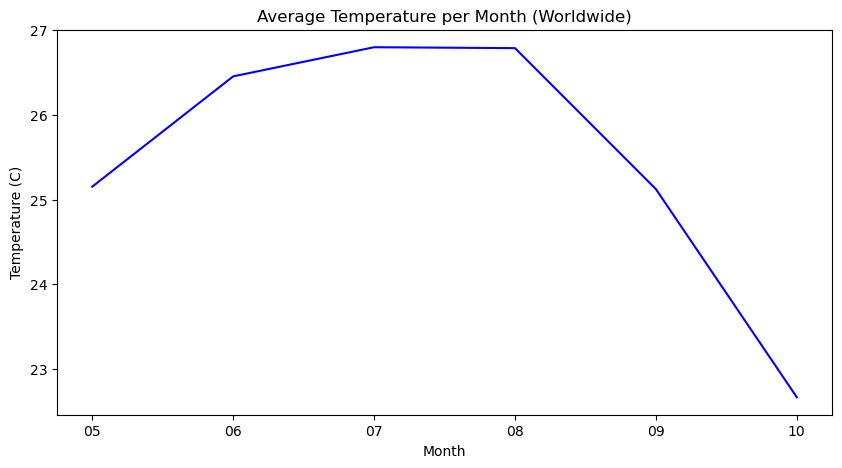

<Figure size 640x480 with 0 Axes>

In [54]:
idx, values = temps.index, temps.values

plt.figure(figsize=(10, 5))
plt.plot(idx, values, color='blue')
plt.title('Average Temperature per Month (Worldwide)')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()
plt.savefig('graphs/averageTemperaturePerMonth.png')

## Temperature (groubed by Region)

In [56]:
df['region'] = df['timezone'].apply(lambda x: x.split('/')[0])
df['region'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Australia', 'Indian',
       'Atlantic', 'Pacific'], dtype=object)

In [96]:
temps = df.groupby('region')['temperature_celsius'].mean().sort_values(ascending=False)
print('Average Temperature per Region (in Celcius):')
temps


Average Temperature per Region (in Celcius):


region
Asia         29.183569
Africa       27.829878
Indian       25.768256
Pacific      24.536084
Europe       23.616949
America      22.569534
Atlantic     18.113548
Australia     6.950968
Name: temperature_celsius, dtype: float64

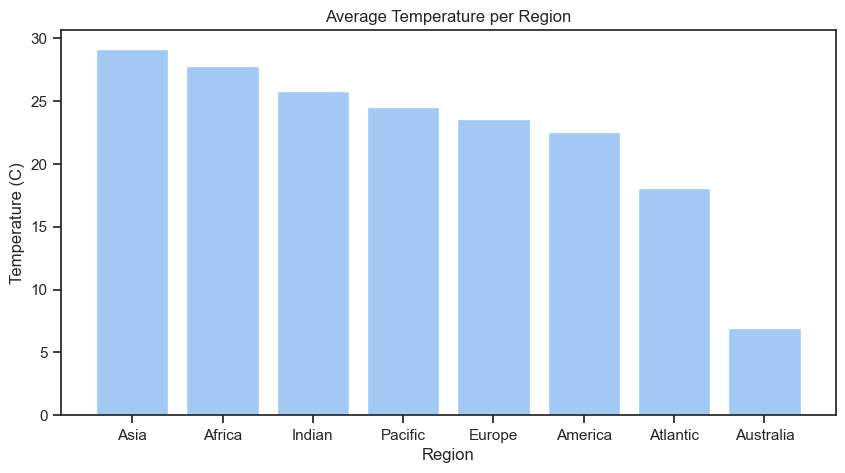

<Figure size 640x480 with 0 Axes>

In [101]:
idx, values = temps.index, temps.values


plt.figure(figsize=(10, 5))
sns.set_theme(style='ticks', palette='pastel')
plt.bar(idx, values)
plt.title('Average Temperature per Region')
plt.xlabel('Region')
plt.ylabel('Temperature (C)')
plt.show()
plt.savefig('graphs/averageTemperaturePerRegion.png')

**Since, the data collected is from May to October 2024, which is winter time in Australia, it shows a lower average temperature than others.**

## Temperature Overtime for Popular Cities

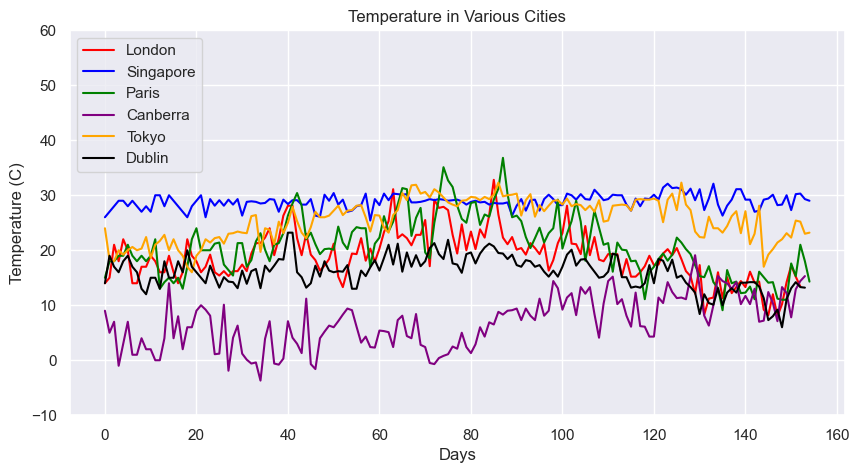

<Figure size 640x480 with 0 Axes>

In [95]:
cities = ['London', 'Singapore', 'Paris', 'Canberra', 'Tokyo', 'Dublin']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
for city, color in zip(cities, colors):
    temp = df[df['location_name'] == city].sort_values(by='last_updated')
    plt.plot(np.arange(len(temp)), temp['temperature_celsius'], color=color, label=city)
plt.xlabel('Days'); plt.ylabel('Temperature (C)')
plt.title('Temperature in Various Cities')
plt.legend(loc='upper left')
plt.ylim(-10, 60)
plt.show();
plt.savefig('graphs/temperatureInVariousCities.png');

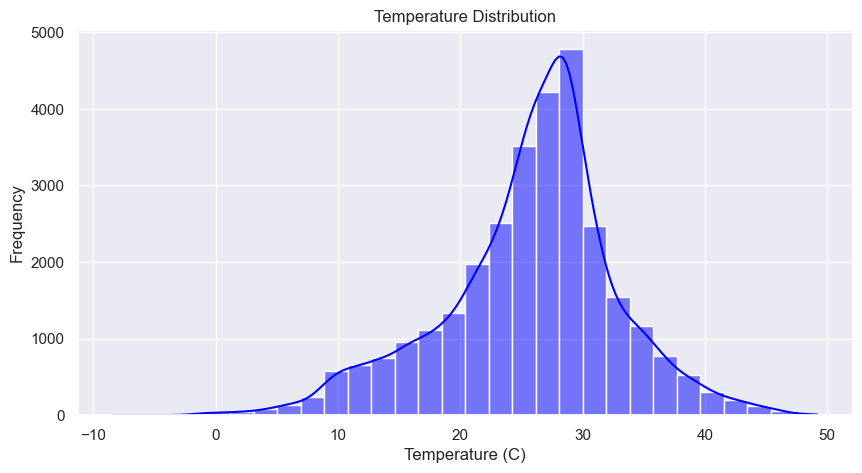

<Figure size 640x480 with 0 Axes>

In [105]:
# Temperature (C) Histogram

plt.figure(figsize=(10, 5))
sns.set_theme(style='darkgrid', palette='deep')
sns.histplot(df['temperature_celsius'], bins=30, color='blue', kde=True)
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()
plt.savefig('graphs/temperatureDistribution.png')